In [1]:
import pandas as pd
import numpy as np

In [5]:
#Reading CSV File

df = pd.read_csv(r"C:\Users\new\Dropbox\My PC (LAPTOP-VOB8LHM1)\Downloads\data.csv")

In [6]:
df.head()

,class_name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [7]:
#dropping the column
df = df.drop(['beats'], axis=1)

In [8]:
#head
df.head()

,class_name,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [9]:

df['class_name'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [10]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [11]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.class_name.unique()))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [12]:
df['class_name'].unique()

[blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
Categories (10, object): [blues, classical, country, disco, ..., metal, pop, reggae, rock]

In [13]:
cols = list(df.columns)
cols.remove('label')
cols.remove('class_label')
cols.remove('class_name')
#df[cols]

In [14]:
#splitting data for training and testing

%matplotlib notebook
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = df.iloc[:,1:28]
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [15]:
#min-max normalisation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>


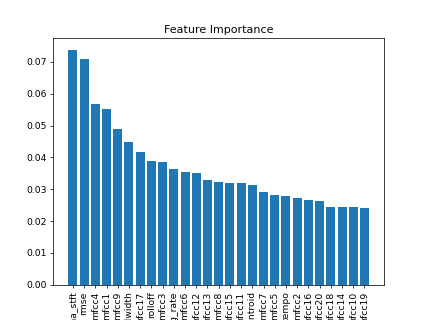

0.704

In [27]:
#Feature importance uisng Random forest

from sklearn.ensemble import RandomForestClassifier
%matplotlib notebook
clf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()
clf.score(X_test_scaled, y_test)

<IPython.core.display.Javascript object>


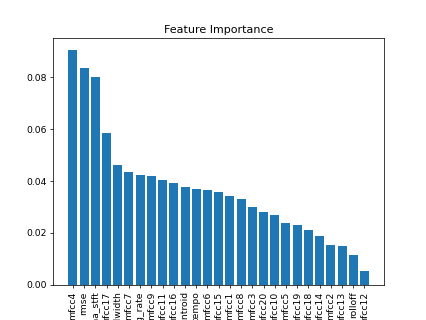

0.444

In [28]:
#Feature importance using Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()
clf.score(X_test_scaled, y_test)

In [18]:
#K Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.624

In [21]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.  Downloading librosa-0.8.1-py3-none-any.whl (203 kB)
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320719 sha256=2e261cfa813055e8afdc2b29424655c49170e203834168672ea9813c2ca401e4
  Stored in directory: c:\users\new\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23143 sha256=4d6a75a28ea3cbc01b6b02c024d98648f5a14c6ffa85075d77840e66f2743819
  Stored in directory: c:\users\new\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
Successfully built resampy audioread



In [22]:
import librosa 
from Metadata import getmetadata
a = getmetadata(r"C:\Users\new\Dropbox\My PC (LAPTOP-VOB8LHM1)\Downloads\reggae.00009.wav")

In [23]:
#Predictin using KNN 

d1 =np.array(a)
data1 = scaler.transform([d1])
genre_prediction = knn.predict(data1)
print(lookup_genre_name[genre_prediction[0]])

reggae


In [24]:
#Support Vector Machine

from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C=10).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.732

In [25]:
#Predicting using SVM

d1 =np.array(a)
data1 = scaler.transform([d1])
genre_prediction = clf.predict(data1)
print(lookup_genre_name[genre_prediction[0]])

reggae
